# 독립 표본 검정
독립 표본 검정은 서로 독립적인 두 집단(예: 남성과 여성, 두 지역의 주민 등)의 평균이나 비율이 통계적으로 유의미하게 다른지를 판단하기 위한 방법입니다. 주로 독립표본 t-검정이 사용되며, 두 집단의 평균을 비교할 때, 각 집단의 데이터가 정규분포를 따르고 분산이 동일하다는 가정을 전제로 합니다. 만약 분산이 다르다면 Welch의 t-검정(Welch's t-test)을 사용하게 됩니다.

* 정규성 검정: 각 집단의 데이터가 정규분포를 따르는지 확인합니다. 대표적으로 Shapiro-Wilk 검정을 사용합니다.
* 분산의 동질성 검정: 두 집단의 분산이 동일한지 확인합니다. Levene 검정이나 Bartlett 검정을 사용할 수 있습니다.

In [9]:
# 귀무가설: 반별 수학 평균 점수는 같다.
# 대립가설: 반별 수학 평균 점수는 다르다.

class1 = [85, 90, 92, 88, 86, 89, 83, 87]
class2 = [80, 82, 88, 85, 84]

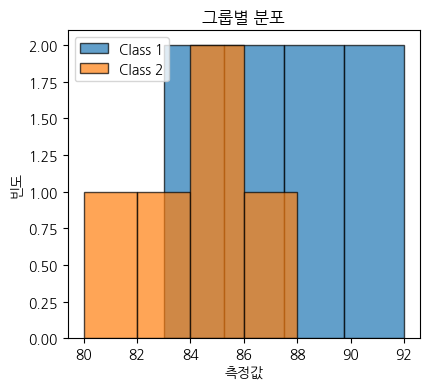

In [12]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 결과 시각화
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(class1, bins='auto', alpha=0.7, label='Class 1', edgecolor='black')
plt.hist(class2, bins='auto', alpha=0.7, label='Class 2', edgecolor='black')
plt.title("그룹별 분포")
plt.xlabel("측정값")
plt.ylabel("빈도")
plt.legend()
plt.show()

In [13]:
# 정규성 검정 (Shapiro-Wilk 검정) // 정규성을 따른다고 볼 수 있다.
stat1, p1 = stats.shapiro(class1)
stat2, p2 = stats.shapiro(class2)
print("그룹1 - Shapiro-Wilk 검정 통계량:", stat1, "p-값:", p1)
print("그룹2 - Shapiro-Wilk 검정 통계량:", stat2, "p-값:", p2)

그룹1 - Shapiro-Wilk 검정 통계량: 0.9981893537736595 p-값: 0.999986994137081
그룹2 - Shapiro-Wilk 검정 통계량: 0.9917398436295009 p-값: 0.9854182266624983


In [15]:
# 분산의 동질성 검정 (Levene 검정) // 두 그룹의 분산이 동일하다고 볼 수 있다.
stat_levene, p_levene = stats.levene(class1, class2)
print("Levene 검정 결과 - 통계량:", stat_levene, "p-값:", p_levene)

Levene 검정 결과 - 통계량: 0.0027925869510027727 p-값: 0.958802951766629


In [18]:
# 독립표본 t-검정 수행
# 분산이 동일하면 equal_var=True, 아니라면 equal_var=False (Welch의 t-검정)
equal_var = True if p_levene > 0.05 else False
t_statistic, p_value = stats.ttest_ind(class1, class2, equal_var=equal_var)
print("T-통계량:", t_statistic)
print("P-값:", p_value)

# 대립가설 채택!

T-통계량: 2.2108140580092237
P-값: 0.04914857789252186


In [19]:
# 귀무가설: 반별 수학 점수 평균 점수는 같다.
# 대립가설: 2반 수학 평균 점수가 더 높다.
stats.ttest_ind(class1, class2, equal_var=equal_var, alternative='less') # 귀무가설을 기각할 수가 없다.

TtestResult(statistic=2.2108140580092237, pvalue=0.9754257110537391, df=11.0)

In [20]:
# 귀무가설: 반별 수학 점수 평균 점수는 같다.
# 대립가설: 1반 수학 평균 점수가 더 높다.
stats.ttest_ind(class1, class2, equal_var=equal_var, alternative='greater') # 1반 수학 평균 점수가 더 높다라고 추론!

TtestResult(statistic=2.2108140580092237, pvalue=0.02457428894626093, df=11.0)

* 만약 정규성을 하나라도 따르지 않았다면?

In [22]:
# Mann-Whitney U 검정: 데이터가 정규분포를 따르지 않더라도 사용할 수 있으며
# 원시 데이터 대신 각 데이터의 순위를 비교하여 검정을 수행 즉, 두 집단의 중앙값이 차이가 있는지 판단
# 정규성이 만족되지 않는다고 가정하고, 비모수 검정 수행
u_statistic, p_value_nonparam = stats.mannwhitneyu(class1, class2)
print("U-통계량:", u_statistic)
print("P-값:", p_value_nonparam)

U-통계량: 33.0
P-값: 0.06652637566016167


## 연습문제
1. 1반과 2반의 평균 점수 차이가 있는지 유의 수준 0.05 하에서 가설 검정하시오.

* 귀무가설: 반별 수학 평균 점수는 같다.
* 대립가설: 2반 수학 평균 점수가 더 높다.

In [38]:
class1 = [85, 90, 92, 88, 86, 89, 83, 87]
class2 = [80, 82, 88, 85, 84]

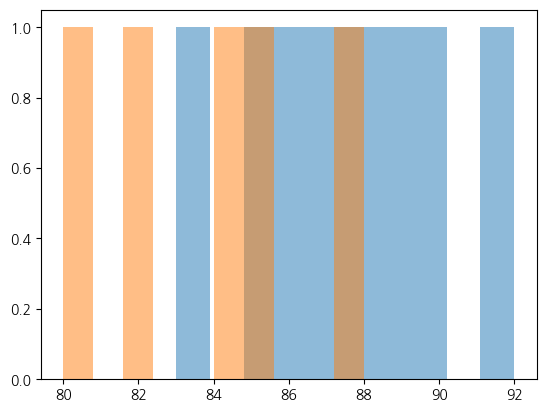

In [39]:
plt.hist(class1, alpha = 0.5)
plt.hist(class2, alpha = 0.5)
plt.show()

In [40]:
print(stats.shapiro(class1))
print(stats.shapiro(class2))

ShapiroResult(statistic=0.9981893537736595, pvalue=0.999986994137081)
ShapiroResult(statistic=0.9917398436295009, pvalue=0.9854182266624983)


In [28]:
print(stats.levene(class1, class2))

LeveneResult(statistic=0.0027925869510027727, pvalue=0.958802951766629)


In [29]:
stats.ttest_ind(class1, class2, alternative='less', equal_var=True)

TtestResult(statistic=2.2108140580092237, pvalue=0.9754257110537391, df=11.0)

2. 1반과 2반의 평균 점수 차이가 있는지 유의 수준 0.05 하에서 가설 검정하시오.
* 귀무가설: 반별 수학 평균 점수는 같다.
* 대립가설: 2반 수학 평균 점수가 더 높다.

In [41]:
class1 = [85, 90, 92, 88, 86, 89, 83, 87]
class2 = [80, 82, 88, 85, 130]

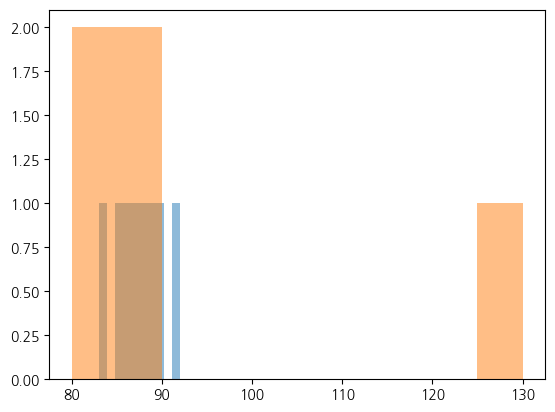

In [42]:
plt.hist(class1, alpha = 0.5)
plt.hist(class2, alpha = 0.5)
plt.show()

In [43]:
print(stats.shapiro(class1))
print(stats.shapiro(class2))

ShapiroResult(statistic=0.9981893537736595, pvalue=0.999986994137081)
ShapiroResult(statistic=0.6880497349322277, pvalue=0.007151570728885509)


In [44]:
stats.mannwhitneyu(class1, class2, alternative='less')

MannwhitneyuResult(statistic=26.0, pvalue=0.8299904236851448)

3. 한 연구자가 특정 튜터링 프로그램이 학생들의 시험 성적에 미치는 영향을 조사하고자 하였습니다. 이를 위해 두 개의 독립 집단을 선정하였습니다. 두 그룹의 평균 시험 점수에 차이가 있는지 검정하시오. (유의수준 0.05)

* 그룹 A: 튜터링 프로그램에 참여한 학생들의 시험 점수
* 그룹 B: 튜터링 프로그램에 참여하지 않은 학생들의 시험 점수

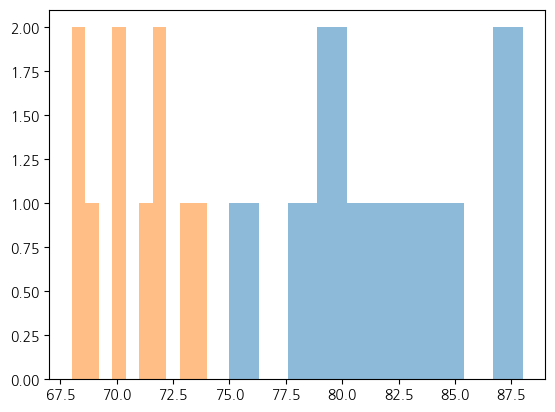

In [47]:
A = [78, 85, 82, 88, 75, 80, 79, 83, 81, 87]
B = [70, 72, 68, 74, 69, 71, 73, 70, 68, 72]

plt.hist(A, alpha = 0.5)
plt.hist(B, alpha = 0.5)
plt.show()

In [48]:
print(stats.shapiro(A))
print(stats.shapiro(B))

ShapiroResult(statistic=0.9808738685761099, pvalue=0.9696722802646456)
ShapiroResult(statistic=0.9498823422157764, pvalue=0.6671086821934071)


In [49]:
print(stats.levene(A, B))

LeveneResult(statistic=3.509532062391682, pvalue=0.07734786417119568)


In [50]:
stats.ttest_ind(A, B, equal_var=True)

TtestResult(statistic=7.686207367576637, pvalue=4.3123377367616994e-07, df=18.0)